# DS 220 Final Project by Hyunwoo Kim

# Introductions

For the final project, I decided to use dataset provided by Azatoth on Kaggle(https://www.kaggle.com/azathoth42/myanimelist/). The dataset was created using web scraping and several other tools as mentioned in the acknowledgement. I have had much interest in applying data science skills for practical uses on things I like, and the dataset provided here on the website piqued my interest to do some data analysis, exploration, and cleaning if necessary--although I believe the dataset is cleaned to a certain extent. Although there are numerous web articles and blogs discussing animes based on stats--anime genre and its relationship to popularity (https://animemotivation.com/most-popular-anime-genres/) or other websites and thoughts on animes--I thought I would be able to explore the statistics of anime with more precision and come up with more interesting analysis from this dataset, which is obtained from MyAnimeList, the largest online community for anime discussion. Since the full users and animelist csv files each is around 6GB, I used a reduced/cleaned csv files with enough data for querying and analysis for this project(unfortunately, my MacBook Retina with 1.3GHz CPU with integrated graphics card cannot handle such large csv data files, unless I divide them into hundreds of chunks).

## Methods & Results

Before we begin our analysis, I first imported the necessary libraries and printed the files I would be using for this project. 

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import sqlite3
#import numpy as np
import ast
#from sqlalchemy import create_engine
db = sqlite3.connect('anidatabase.db')
print(os.getcwd())
print(os.listdir(os.getcwd()))

/Users/hyun/Documents/Summer 2019/DS 220/final
['Animelist.csv', '.DS_Store', 'anidatabase.db', 'final_project.ipynb', '.ipynb_checkpoints', 'users_cleaned.csv']


Next, I imported the csv files and stored them into Pandas DataFrame. To see what sorts of information I am working with, I then printed a list of columns of information from each of the file. The two csv files then have been added to the sqlite database as two different tables, each with a corresponding name. 

In [5]:
cur = db.cursor()
anilist = pd.read_csv('./Animelist.csv')
userlist = pd.read_csv('./users_cleaned.csv')
print('anilist has {} entries with the following columns: \n{}\n'.format(len(anilist.index),
                                                                         anilist.columns.tolist()))
anilist.to_sql('anime_list',db,if_exists='replace',index=False)
print('userlist has {} entries with the following columns: \n{}'.format(len(userlist.index),
                                                                        userlist.columns.tolist()))
userlist.to_sql('user_list',db,if_exists='replace',index=False)
cur.close()

anilist has 14478 entries with the following columns: 
['anime_id', 'title', 'title_english', 'title_japanese', 'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status', 'airing', 'aired_string', 'aired', 'duration', 'rating', 'score', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background', 'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre', 'opening_theme', 'ending_theme']

userlist has 108711 entries with the following columns: 
['username', 'user_id', 'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'user_days_spent_watching', 'gender', 'location', 'birth_date', 'access_rank', 'join_date', 'last_online', 'stats_mean_score', 'stats_rewatched', 'stats_episodes']


With the list of columns printed above, I had more clear idea of what sorts of information was in the data and how I would manipulate or use it to see some relationships. After I confirmed the data transmissions was completed successfully, I proceeded to print out a few entries from each table to understand what datatypes I am working with from each column.

In [6]:
c = db.cursor()
print('anilist still has {} entries'.format(c.execute("SELECT count(*) FROM anime_list").fetchall()))
print('userlist still has {} entries'.format(c.execute('select count(*) from user_list').fetchall()))
print('anidatabase.db now has the following tables:\n{}\n'
     .format(c.execute("select name from sqlite_master where type='table';").fetchall()))
for _ in c.execute('select * from user_list limit 5'):
    print(_)
for _ in c.execute('select * from anime_list limit 5'):
    print(_)

c.close()

anilist still has [(14478,)] entries
userlist still has [(108711,)] entries
anidatabase.db now has the following tables:
[('anime_list',), ('user_list',)]

('karthiga', 2255153, 3, 49, 1, 0, 0, 55.09166666666667, 'Female', 'Chennai, India ', '1990-04-29 00:00:00', None, '2013-03-03 00:00:00', '2014-02-04 01:32:00', 7.43, 0.0, 3391)
('Damonashu', 37326, 45, 195, 27, 25, 59, 82.57430555555554, 'Male', 'Detroit,Michigan', '1991-08-01 00:00:00', None, '2008-02-13 00:00:00', '2017-07-10 06:52:54', 6.15, 6.0, 4903)
('bskai', 228342, 25, 414, 2, 5, 11, 159.48333333333332, 'Male', 'Nayarit, Mexico', '1990-12-14 00:00:00', None, '2009-08-31 00:00:00', '2014-05-12 16:35:00', 8.27, 1.0, 9701)
('terune_uzumaki', 327311, 5, 5, 0, 0, 0, 11.394444444444444, 'Female', 'Malaysia, Kuantan', '1998-08-24 00:00:00', None, '2010-05-10 00:00:00', '2012-10-18 19:06:00', 9.7, 6.0, 697)
('Bas_G', 5015094, 35, 114, 6, 20, 175, 30.45833333333333, 'Male', 'Nijmegen, Nederland', '1999-10-24 00:00:00', None, '2015-1

But as you can see, the data representation using sqlite3's cursor.execute() is quite difficult to read, so I used pandas dataframe to have a better look at the datas.

In [7]:
print(anilist.iloc[:5,:16])
print(anilist.iloc[:5,16:])

   anime_id                title              title_english title_japanese  \
0     11013        Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
1      2104     Seto no Hanayome      My Bride is a Mermaid          瀬戸の花嫁   
2      5262   Shugo Chara!! Doki         Shugo Chara!! Doki    しゅごキャラ！！どきっ   
3       721        Princess Tutu              Princess Tutu      プリンセスチュチュ   
4     12365  Bakuman. 3rd Season                   Bakuman.          バクマン。   

                                  title_synonyms  \
0                                Youko x Boku SS   
1                           The Inland Sea Bride   
2  Shugo Chara Ninenme, Shugo Chara! Second Year   
3                                            NaN   
4                               Bakuman Season 3   

                                           image_url type    source  episodes  \
0  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        12   
1  https://myanimelist.cdn-dena.com/images/anime/...   T

In [8]:
print(userlist.iloc[:5])

         username  user_id  user_watching  user_completed  user_onhold  \
0        karthiga  2255153              3              49            1   
1       Damonashu    37326             45             195           27   
2           bskai   228342             25             414            2   
3  terune_uzumaki   327311              5               5            0   
4           Bas_G  5015094             35             114            6   

   user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0             0                 0                 55.091667  Female   
1            25                59                 82.574306    Male   
2             5                11                159.483333    Male   
3             0                 0                 11.394444  Female   
4            20               175                 30.458333    Male   

              location           birth_date  access_rank            join_date  \
0      Chennai, India   1990-04-29 00:00:00    

Now I know the datatypes of each of the columns, I performed some basic queries on the database to yield some data and narrow down how I would analyze/manipulate the dataset.

In [71]:
c = db.cursor()
#show titles and genres of animes produced by J.C.Staff and title has 'kagaku' in it
for _ in c.execute("select title, genre from anime_list where studio like 'j.c.staff' \
and title like '%kagaku%' and type is 'TV'"):
    print(_)
#show titles and opening themes of animes sung by Konomi Suzuki for animes
for _ in c.execute("select title, opening_theme from anime_list \
where opening_theme like '%Konomi Suzuki%'"):
    print(_)
c.close()

('Toaru Kagaku no Railgun', 'Action, Sci-Fi, Super Power')
('Toaru Kagaku no Railgun S', 'Action, Sci-Fi, Super Power')
('Tasogare Otome x Amnesia', '[\'"CHOIR JAIL (クワイア ジェイル)" by Konomi Suzuki\']')
('Rokudenashi Majutsu Koushi to Akashic Records', '[\'"Blow out" by Konomi Suzuki\']')
('Watashi ga Motenai no wa Dou Kangaetemo Omaera ga Warui!', '[\'"Watashi ga Motenai no wa Dou Kangaete mo Omaera ga Warui (私がモテないのはどう考えてもお前らが悪い)" by Konomi Suzuki n&#039; Kiba of Akiba\']')
('Fairy Tail (2014)', '[\'#1: "MASAYUME CHASING" by BoA (eps 1-13)\', \'#2: "STRIKE BACK" by BACK-ON (eps 14-28)\', \'#3: "Mysterious Magic" by Do As Infinity (eps 29-39)\', \'#4: "BREAK OUT" by V6 (eps 40-51)\', \'#5: "Yume-iro Graffiti (ユメイログラフィティ)" by Tackey & Tsubasa (eps 52-64)\', \'#6: "NEVER-END TALE" by Tatsuyuki Kobayashi and Konomi Suzuki (eps 65-77)\', \'#7: "Believe In Myself" by EDGE of LIFE (eps 78-90)\', \'#8: "Ashita wo Narase (明日を鳴らせ)" by Kavka Shishido (eps 91-102)\']')
('Watashi ga Motenai no wa Do

Since the 'aired' column in the anime_list has its valued stored in a 'TEXT' format despite looking like a JSON-type, I decided to use the Abstract Syntax Trees library in Python to extract 'from' values from the anime_list['airing'] and further splitted the values into years and season(months). 

In [66]:
c = db.cursor()
print("The data type of 'aired' column",
      'from the anime_list is',
      c.execute("select distinct typeof('aired') from anime_list").fetchall())
#ast.literal_eval to extract aired_from date for each animes
print(ast.literal_eval(anilist['aired'][0])['from'])
print(ast.literal_eval(anilist['aired'][0])['to'])
fromdates = [ast.literal_eval(x)['from'] for x in anilist['aired']]
#aired_from_year = [int(_[:4]) for _ in fromdates[:3]]
aired_from_year = []
for x in fromdates:
    if x == None:
        aired_from_year.append(x)
    else:
        aired_from_year.append(int(x[:4]))
aired_from_season = []
for _ in fromdates:
    if _ == None:
        aired_from_season.append(_)
    else:
        s = ''
        if int(_[5:7]) < 4:
            s = 'Winter'
        elif int(_[5:7]) < 7:
            s = 'Spring'
        elif int(_[5:7]) < 10:
            s = 'Summer'
        elif int(_[5:7]) > 9:
            s = 'Fall'
        aired_from_season.append(s)
#merged aired_from
aired_from = []
for _ in fromdates:
    if _ == None:
        aired_from.append(_)
    else:
        ind = fromdates.index(_)
        mo = 0
        if int(_[5:7]) < 4:
            mo = 1
        elif int(_[5:7]) < 7:
            mo = 2
        elif int(_[5:7]) < 10:
            mo = 3
        elif int(_[5:7]) > 9:
            mo = 4
        aired_from.append(float(str(aired_from_year[ind])+'.'+str(mo)))
c.close()
print(aired_from_year[:5],aired_from_season[:5],aired_from[:5])

The data type of 'aired' column from the anime_list is [('text',)]
2012-01-13
2012-03-30
[2012, 2007, 2008, 2002, 2012] ['Winter', 'Spring', 'Fall', 'Summer', 'Fall'] [2012.1, 2007.2, 2008.4, 2002.3, 2012.4]


I then added the newly formed lists into the database.

In [69]:
c = db.cursor()
anilist['aired_from_season']=aired_from_season
anilist['aired_from_year']=aired_from_year
anilist['aired_from']=aired_from
#anilist.head()
anilist.to_sql('anime_list',db,if_exists='replace',index=False) #replacing is fine since I have not touched any data
#print(c.execute("select * from anime_list limit 1").fetchall())
print(anilist.iloc[15,])
#It is confirmed that the new data columns have been created within the database
c.close()

anime_id                                                            59
title                                                          Chobits
title_english                                                  Chobits
title_japanese                                                   ちょびっツ
title_synonyms                                                     NaN
image_url            https://myanimelist.cdn-dena.com/images/anime/...
type                                                                TV
source                                                           Manga
episodes                                                            26
status                                                 Finished Airing
airing                                                           False
aired_string                               Apr 3, 2002 to Sep 25, 2002
aired                       {'from': '2002-04-03', 'to': '2002-09-25'}
duration                                               24 min. per ep.
rating

Now that I had done several queries and data manipulation in the SQLite database using SQLite and Python's sqlite3 module, I proceeded to do some data analysis of the anime list data. Unfortunately, after several queries on the dataset user_list, I found out that there is no relationship between the anime_list and the user_list--no matching private keys and foreign keys found--and also the user_list itself had not so much a relevant data. Perhaps a larger version of the file may contain more columns with more values, but as for this project I proceeded to do data analysis within the anime_list only. And for the data analysis, with the newly created columns of aired_from--simplified data of the original column 'aired' for easier analysis--I thought it would be best to show the relationship between the popularity of animes/number of members watched and the season/year the anime started airing in.

In [115]:
x = anilist['aired_from_season']
df = anilist
d = []

df = df.dropna()
x = set(df['aired_from'])
x = sorted(list(x))
df.sort_values(by='aired_from')
for i in set(df['aired_from'].values):
    if i == 'nan':
        pass
    else:
        temp = df[df['aired_from']==i]
        print(temp['members'].sum())
        d.append(temp['members'].sum())

1291282
631656
827781
2928905
1126375
51894
3481244
2224741
35475
383790
3828164
3250278
524172
1460976
1208587
2201859
32276
118662
6715
40614
66929
99438
5266
1069632
104327
318335
669511
8416
183151
272713
233529
641101
461930
302027
353024
720133
378063
292572
211233
930291
756078
605331
1908188
1958544
1633166
2053867
2351050
983464
1572703
2656081
1975866
2670416
1477190
3308260
3328838
2138379
2711203
156078
616561
2538097
3039446
397589
308483
184696
833388
1879853
207736
468959
183839
213583
827759
2045682


<IPython.core.display.Javascript object>


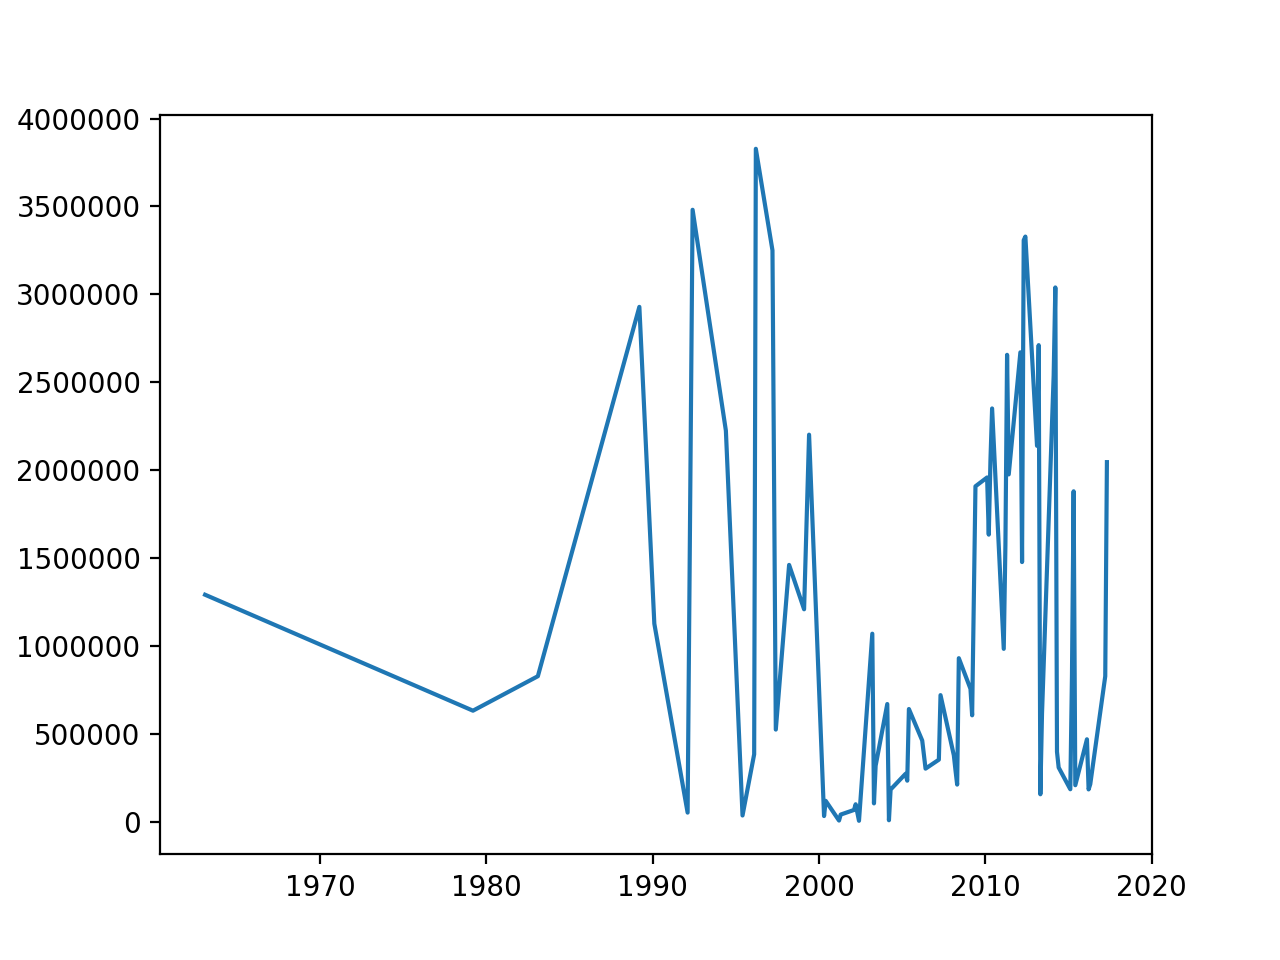

In [116]:
plt.plot(x,d)

plt.show()


The graph does look unorganized and inordinary due to the nature of the given dataset as I forced to analyze the number of members by the year. However, I can draw some reasonable conclusions from this data: there has been a rise in the number of members watching around 1992, 1996, and after 2009. And after some peak of the number of the members watching certain animes, the number of members watching drops rapidly. The dataset had many nan values for the 'aired' and therefore 'aired_from' that I created, which I believe is the reason why the graph ended up looking quite skewed and weird to look at. 

## Discussion

As you can see throughout the jupyter notebook, working with sqlite3 library through python yielded outputs that do not look easy to read. More often than not, executing SQL commands through database cursor involved more complex syntax. However, using SQL on the dataset allowed for a variety of data manipulation and analysis and also allowed for easier data maintenance through the use of a database. It was easier to perform multi-layer queries through SQLite commands, and with the help of them, I could pull out the necessary data, which then I used matplotlib for more detailed analysis. By using different libraries within Python alongside with SQLite functionality, the data analysis I wished to obtain was done successfully. Although the dataset consist of enough entries and columns that allowed for some degree of precise analysis, I would like to explore the possibility of working with a more complex dataset of the samekind that has one million+ rows by incorporating chunksize splitting and other tools so I can perform more enhanced queries regarding this topic. Since the two datasets, anime_list and user_list, didn't have anything in common--matching private and foreign keys, etc.--I could not perform any join queries and discover interesting relationships between the datasets. Still, I would like to do another web scraping on the MyAnimeList to get an updated data or incorporate GraphQL from other large Anime community such as AniList, so that I would work with an updated data that would be more relevant. It was very exciting to work with this dataset as the dataset was more complicated then what I have been taught in classes. Despite many limitations and unexpected turnouts throughout my coding, I could come to a conclusion with sound results. 

## Acknowledgement

I did not feel much need to cite the sources as they are mostly looking up documentations, but I still listed them below in case necessary. The first link is the Kaggle website from which I got my dataset, but the author didn't list any citation methods so I am only having the link below.

https://www.kaggle.com/azathoth42/myanimelist

https://docs.python.org/2/library/sqlite3.html#sqlite3.Cursor

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html

https://stackoverflow.com/questions/5189997/python-db-api-fetchone-vs-fetchmany-vs-fetchall

https://brohrer.github.io/dataframe_indexing.html